In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Seaborn kutubxonasidan uning datasetlarini tanlash uchun chiqarib olamiz

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('tips')

#### tips datasetini tanladim

In [10]:
display(df.head())
display(f"o'lchami = {df.shape}")
display(f'ustunlari = {df.columns}')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


"o'lchami = (244, 7)"

"ustunlari = Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')"

In [12]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Dataframening statistik ma'lumotlarini chiqarib oldim

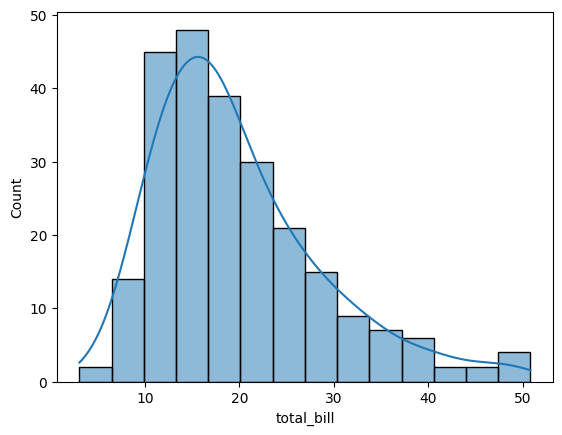

In [13]:
sns.histplot(df['total_bill'], kde = True)
plt.show()

### 'total_bill' ustunining orginal shkalasini chiqarib oldim endi standardisation shkalasida chiqaramiz 

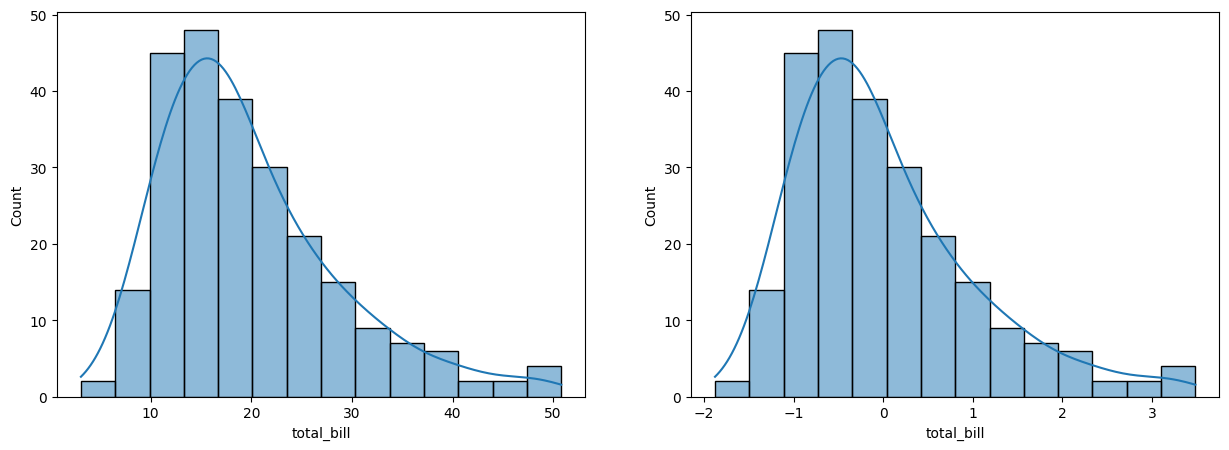

In [22]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
standard_scale = (x_ttl - x_ttl.mean()) / x_ttl.std()
sns.histplot(x_ttl, kde = True, ax = ax0)
sns.histplot(standard_scale, kde = True, ax= ax1)
plt.show()

### Hosil bo'lgan natijaga ko'ra distogrammaning shakli o'zgargani yo'q, lekin kordinatalar o'zgardi, ya'ni variansni 1ga o'rtacha arifmetikni 0ga olib kelib qo'ydi

#### Standardisationda outlierlarni saqlab qoladi buni boxplot bilan tekshirib ko'ramiz

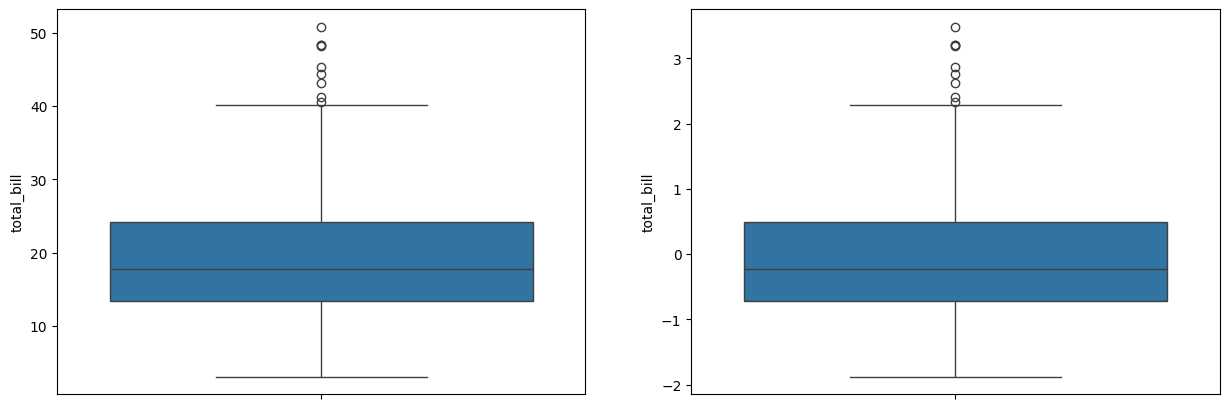

In [23]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
standard_scale = (x_ttl - x_ttl.mean()) / x_ttl.std()
sns.boxplot(x_ttl, ax = ax0)
sns.boxplot(standard_scale, ax= ax1)
plt.show()

#### Ko'rib turganimizdek outlierlarni boricha saqlab qoldi

## Min-max scaling

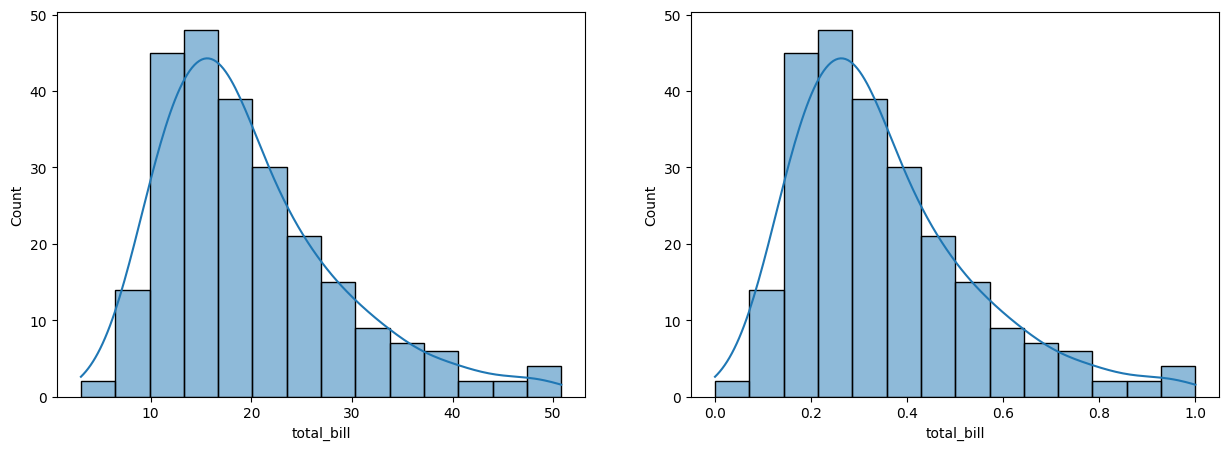

In [24]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
min_max = (x_ttl - x_ttl.min()) / (x_ttl.max() - x_ttl.min())
sns.histplot(x_ttl, kde = True, ax = ax0)
sns.histplot(min_max, kde = True, ax= ax1)
plt.show()

### Min-max scalingda maximal qiymat 1, minimal qiymat esa 0 ga teng ya'ni grafik kordinatalari 0 va 1 o'rtasida yotadi. Min-max scalingda ham outlierlar saqlab qolinadi, o'rtacha qiymat va median o'zgaradi

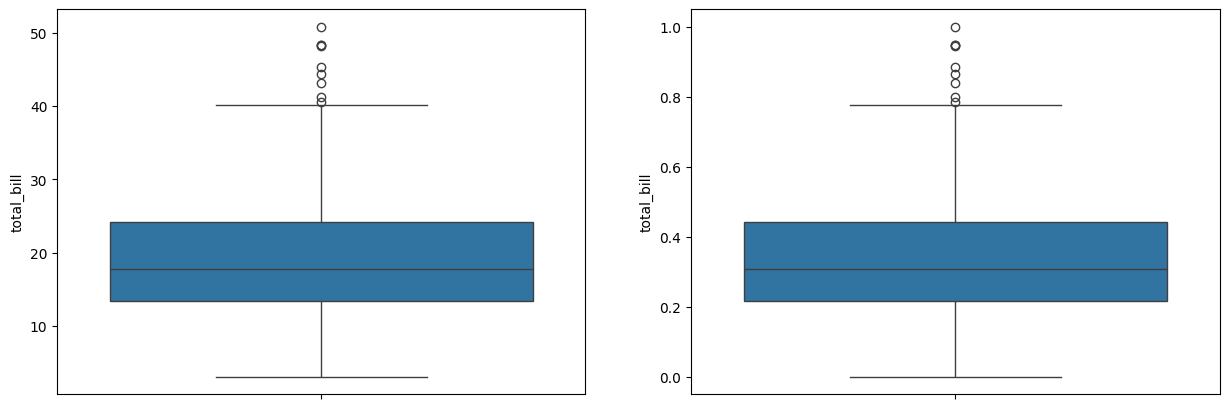

In [25]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
min_max = (x_ttl - x_ttl.min()) / (x_ttl.max() - x_ttl.min())
sns.boxplot(x_ttl, ax = ax0)
sns.boxplot(min_max, ax= ax1)
plt.show()

#### Natijada outlierlar saqlab qolingan  shakl ham o'rgarmagan

## Mean Normalisation

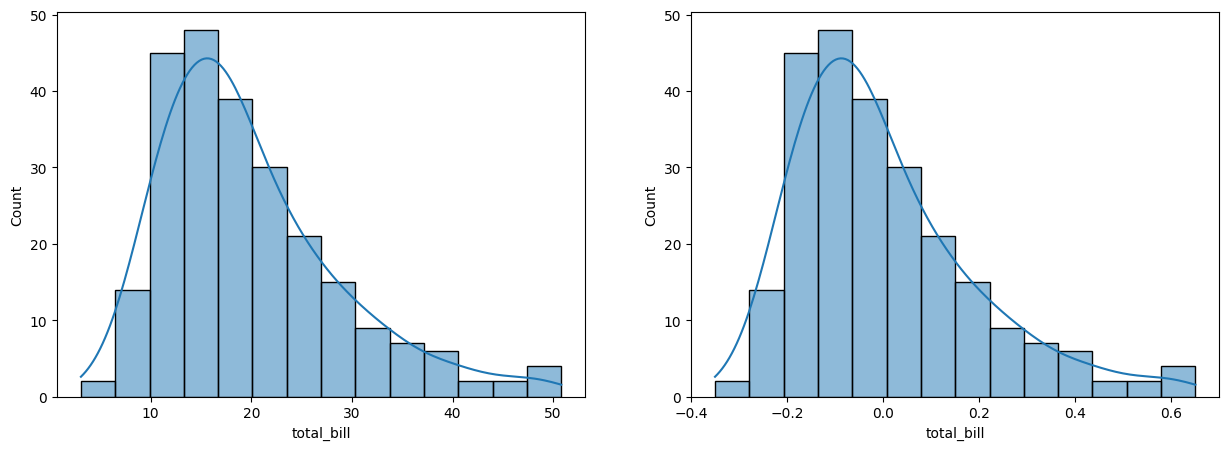

In [26]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
mean_n = (x_ttl - x_ttl.mean()) / (x_ttl.max() - x_ttl.min())
sns.histplot(x_ttl, kde = True, ax = ax0)
sns.histplot(mean_n, kde = True, ax= ax1)
plt.show()

#### Mean normalisationda o'rta arifmetik qiymatni 0 ga olib kelib qo'yadi, min va max -1 va 1 orasida yotadi, variance o'zgaradi hamda bunda ham outlierlar saqlab qolinadi

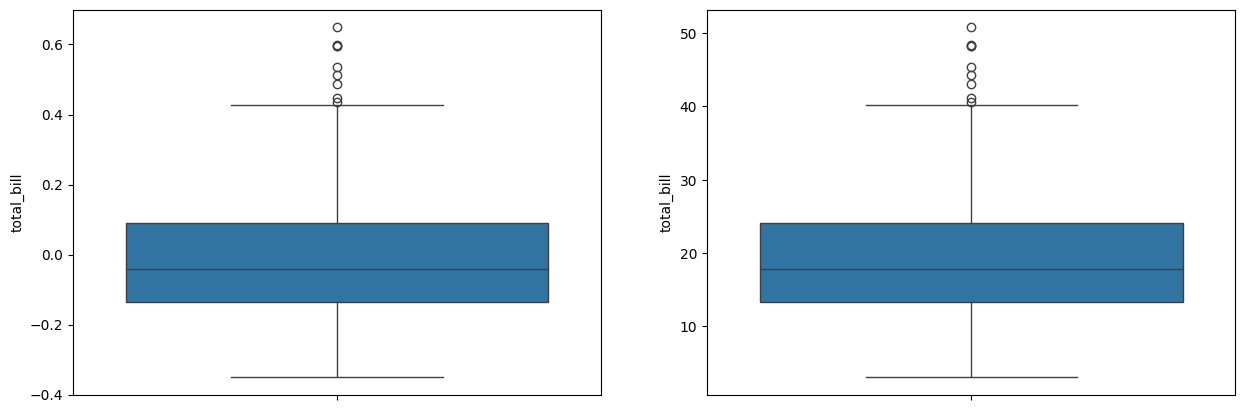

In [27]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
mean_n = (x_ttl - x_ttl.mean()) / (x_ttl.max() - x_ttl.min())
sns.boxplot(mean_n, ax = ax0)
sns.boxplot(x_ttl, ax= ax1)
plt.show()

#### Ko'rib turganimizdek shakl o'zgargani yo'q, outlierlar ham o'z joyida lekin o'rtacha qiymat 0 tenglandi

## MaxAbsScaling

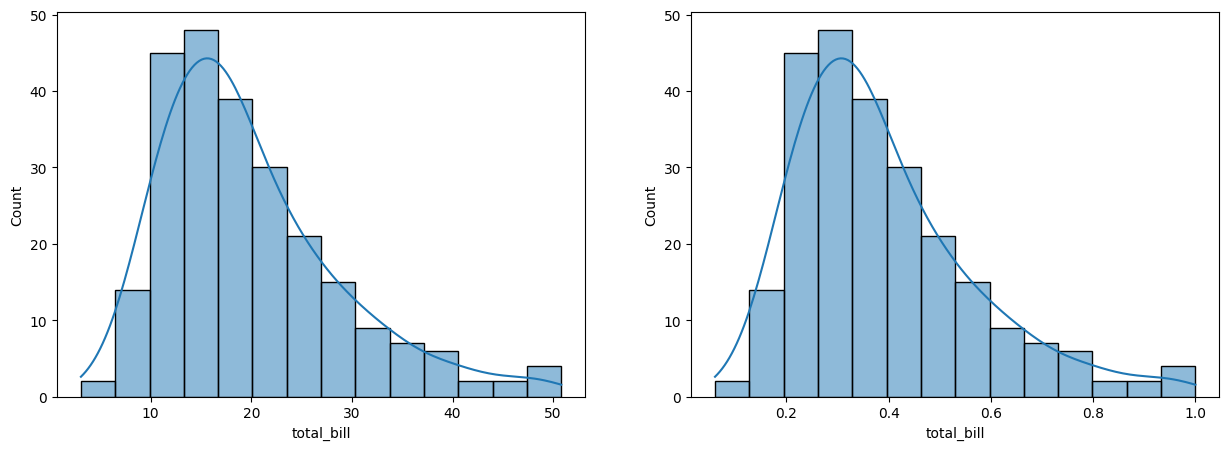

In [28]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
max_scn = x_ttl / abs(x_ttl.max())
sns.histplot(x_ttl, kde = True, ax = ax0)
sns.histplot(max_scn, kde = True, ax= ax1)
plt.show()

### Max scalingda grafik -1 va 1 kordinatalarida yotadi, o'rta arifmetik markazlashtirilmagan

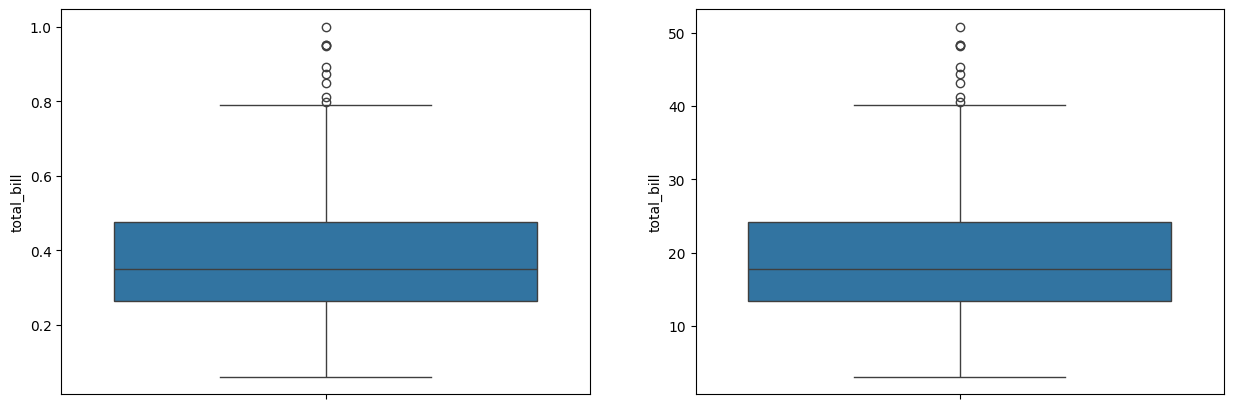

In [29]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
max_scn = x_ttl / abs(x_ttl.max())
sns.boxplot(max_scn, ax = ax0)
sns.boxplot(x_ttl, ax= ax1)
plt.show()

### Va bunda ham outliearlar saqlanib qoladi

## Scaling to median and IQR - Robust scaling


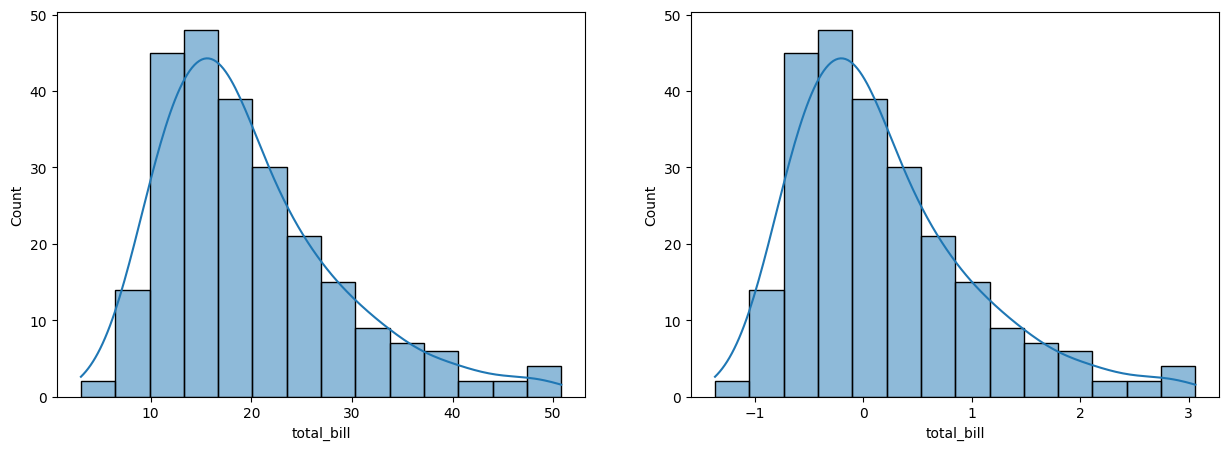

In [35]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
rbst_sc = (x_ttl - x_ttl.median()) / (x_ttl.quantile(0.75) - x_ttl.quantile(0.25))
sns.histplot(x_ttl, kde = True, ax = ax0)
sns.histplot(rbst_sc, kde = True, ax= ax1)
plt.show()

### Robust scalingda median 0ga keltiriladi va outlierlar ham saqlab qolinadi

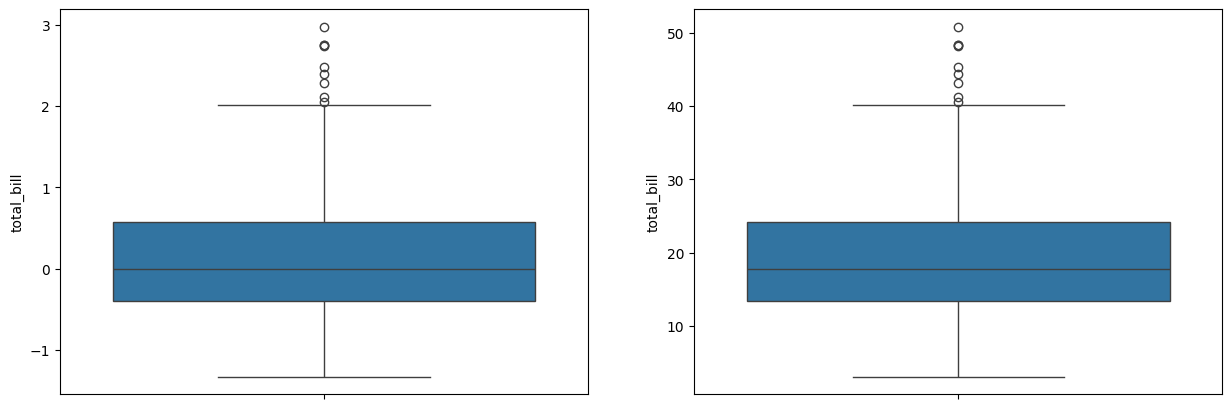

In [36]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
x_ttl = df['total_bill']
rbst_sc = (x_ttl - x_ttl.median()) / (x_ttl.quantile(0.75) - x_ttl.quantile(0.23))
sns.boxplot(rbst_sc, ax = ax0)
sns.boxplot(x_ttl, ax= ax1)
plt.show()

### outlierlar o'z joyida

#### Hamma scaling usullari uchun ko'rib chiqdim